Machine Learning is a set of techniques to make computers better at doing things that humans (traditionally) can do better than machines. Involves machines learn things like humans do. Human brains has neurons (when humans think, chemical signal generates and neurons light up).

Mathematical Models and Deep Learning are part of Machine Learning

Spam filter is also part of Machine Learning (also Amazon Alexa, Google Home, Youtube Recommended Videos, Driverless Cars)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Linear Regression with Single Variable

In [5]:
df_url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/homeprices.csv'
df = pd.read_csv(df_url, error_bad_lines=False)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
%matplotlib inline

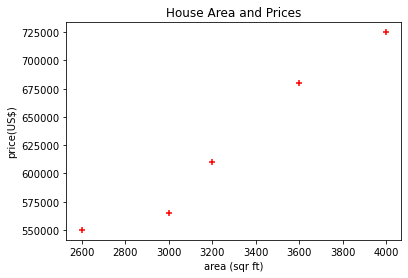

In [7]:
plt.title('House Area and Prices')
plt.xlabel('area (sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color = 'red', marker = '+')

In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(df[['area']], df.price)

LinearRegression()

In [10]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [11]:
reg.predict([[3300]]) #see the below 3 codes to see how that was acheived

array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

In [14]:
#y = m*x + b
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

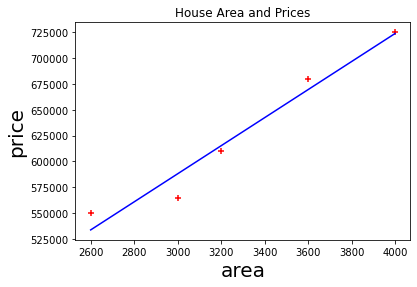

In [15]:
plt.title('House Area and Prices')
plt.xlabel('area', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.plot(df.area, reg.predict(df[['area']]), color = 'blue')

In [16]:
d_url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/areas.csv'
d = pd.read_csv(d_url, error_bad_lines=False)

In [17]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [18]:
d.head(3)

,area
0,1000
1,1500
2,2300


In [19]:
p = reg.predict(d)

In [20]:
d['prices'] = p

In [21]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [22]:
#d.to_csv("prediction.csv") #export to another csv file which was not created yet 
d.to_csv('prediction.csv', index = False) #the above code exported to csv with indexes 0 to 12 as shown in above dataframe. by doing index = False, index will not be shown

## EXERCISE 1

In [23]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv'
ex_df = pd.read_csv(url, error_bad_lines=False)

In [28]:
ex_reg = linear_model.LinearRegression()
ex_df.rename(columns = {'year':'year', 'per capita income (US$)':'percapitaincome'}, inplace = True) 
ex_reg.fit(ex_df[['year']], ex_df.percapitaincome)

LinearRegression()

In [29]:
ex_reg.predict([[2020]])

array([41288.69409442])

In [30]:
ex_df

,year,percapitaincome
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


# Linear Regression with Multi-Variable

Independent Variables (x) known as features. 
In this case there are multiple independent variables. 

In [31]:
mv_url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv'
mv_df = pd.read_csv(mv_url, error_bad_lines=False)
mv_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Note that the 3200 doesnt have data for bedrooms. So we will just take the median for that point.

In [39]:
median_bedrooms = mv_df.bedrooms.median()

In [ ]:
"""
#if median wasn't integer:

import math
median_bedrooms = math.floor(df.bedrooms.median())

"""

In [42]:
mv_df.bedrooms = mv_df.bedrooms.fillna(median_bedrooms) #to fill NA datapoints
mv_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [46]:
mv_reg = linear_model.LinearRegression()
mv_reg.fit(mv_df[['area', 'bedrooms', 'age']], mv_df.price)

LinearRegression()

In [50]:
mv_reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [53]:
mv_reg.intercept_

221323.00186540443

In [54]:
mv_reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [56]:
mv_reg.predict([[2500,4,5]])

array([578876.03748933])

In [59]:
112.06244194*3000 + 23388.88007794*3 -3231.71790863*40 + 221323.00186540443 #equation for the prediction

498408.25157402444

## Exercise

In [97]:
mv_ex_url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv'
mv_ex = pd.read_csv(mv_ex_url, error_bad_lines = False)
mv_ex

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [98]:
mv_ex.experience = mv_ex.experience.fillna('zero')

In [99]:
mv_ex

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [100]:
mv_ex.rename(columns = {'test_score(out of 10)':'test_score_max10', 'interview_score(out of 10)': 'interview_score_max10','salary($)':'salary'}, inplace = True) 

In [101]:
mv_ex

,experience,test_score_max10,interview_score_max10,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [102]:
from word2number import w2n
mv_ex['experience'] = mv_ex['experience'].apply(lambda x: w2n.word_to_num(x))
mv_ex

,experience,test_score_max10,interview_score_max10,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [104]:
median_test = mv_ex.test_score_max10.median()
mv_ex.test_score_max10 = mv_ex.test_score_max10.fillna(median_test)
"""
in the answer given:

import math 
median_test_score = math.floor(d['test_score_max10'].mean())
#then they fill. they have used math mean

In [105]:
mv_ex

,experience,test_score_max10,interview_score_max10,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [106]:
mv_ex_reg = linear_model.LinearRegression()

In [108]:
mv_ex_reg.fit(mv_ex[['experience', 'test_score_max10', 'interview_score_max10']], mv_ex.salary)

LinearRegression()

In [110]:
mv_ex_reg.predict([[2,9,6]])

array([53205.96797671])

In [111]:
mv_ex_reg.predict([[12,10,10]])

array([92002.18340611])